<a href="https://colab.research.google.com/github/svfrolov/YP-project/blob/main/%E2%84%9610_%D0%97%D0%B0%D1%89%D0%B8%D1%82%D0%B0_%D0%BF%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

# Описание проекта

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Инструкция по выполнению проекта:

1. Загрузите и изучите данные.


2. Ответьте на вопрос и обоснуйте решение.


* Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

  * a. `Изменится.` Приведите примеры матриц.
  * b. `Не изменится.` Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.


4.  Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. `Примените метрику R2.`

# Описание данных

* Набор данных находится в файле `/datasets/insurance.csv.`


* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.


* `Целевой признак:` количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [ ]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
try:
    df = pd.read_csv('C:/Users/fs//Desktop/Проект.2/insurance.csv') 
except:
    df = pd.read_csv('/datasets/insurance.csv')

In [ ]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
print('Дублкаты - ', df.duplicated().sum())

Дублкаты -  153


дубликаты не должны повлиять, не удаляем

Пропуски в данных отсутствуют


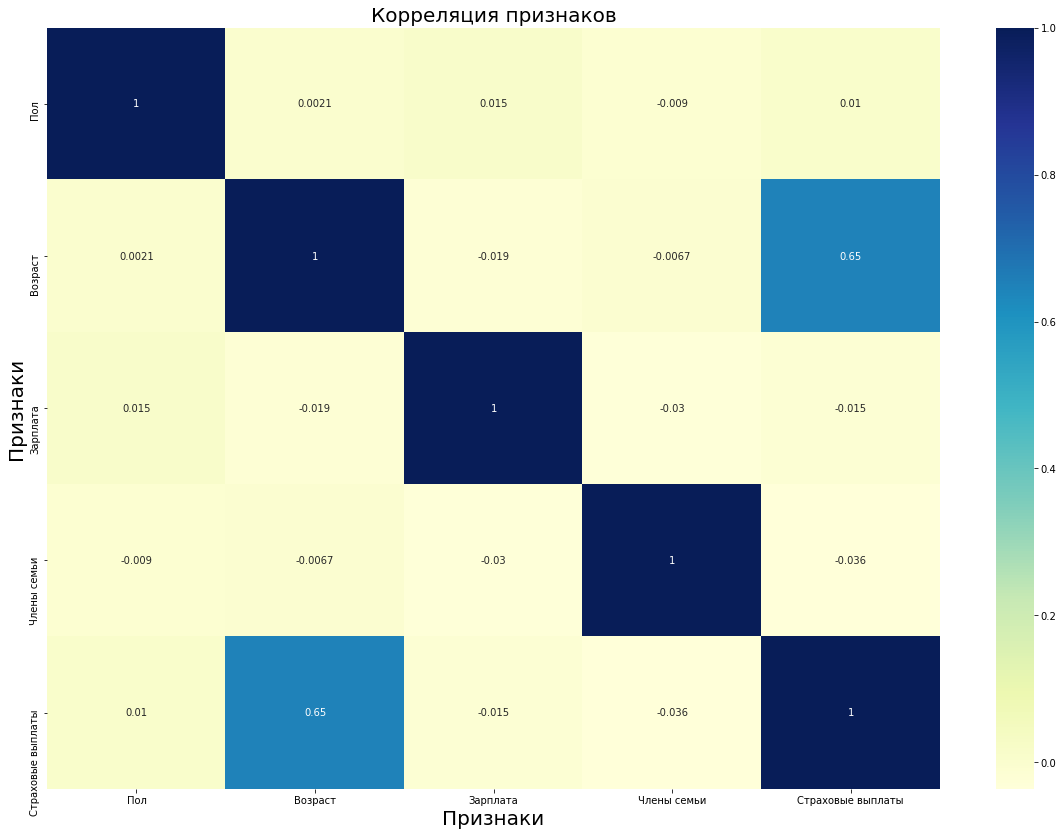

In [ ]:
cr = df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(cr, annot = True, cmap="YlGnBu", square=False)

plt.title('Корреляция признаков', fontsize = 20)
plt.xlabel('Признаки', fontsize = 20)
plt.ylabel('Признаки', fontsize = 20)
plt.show()

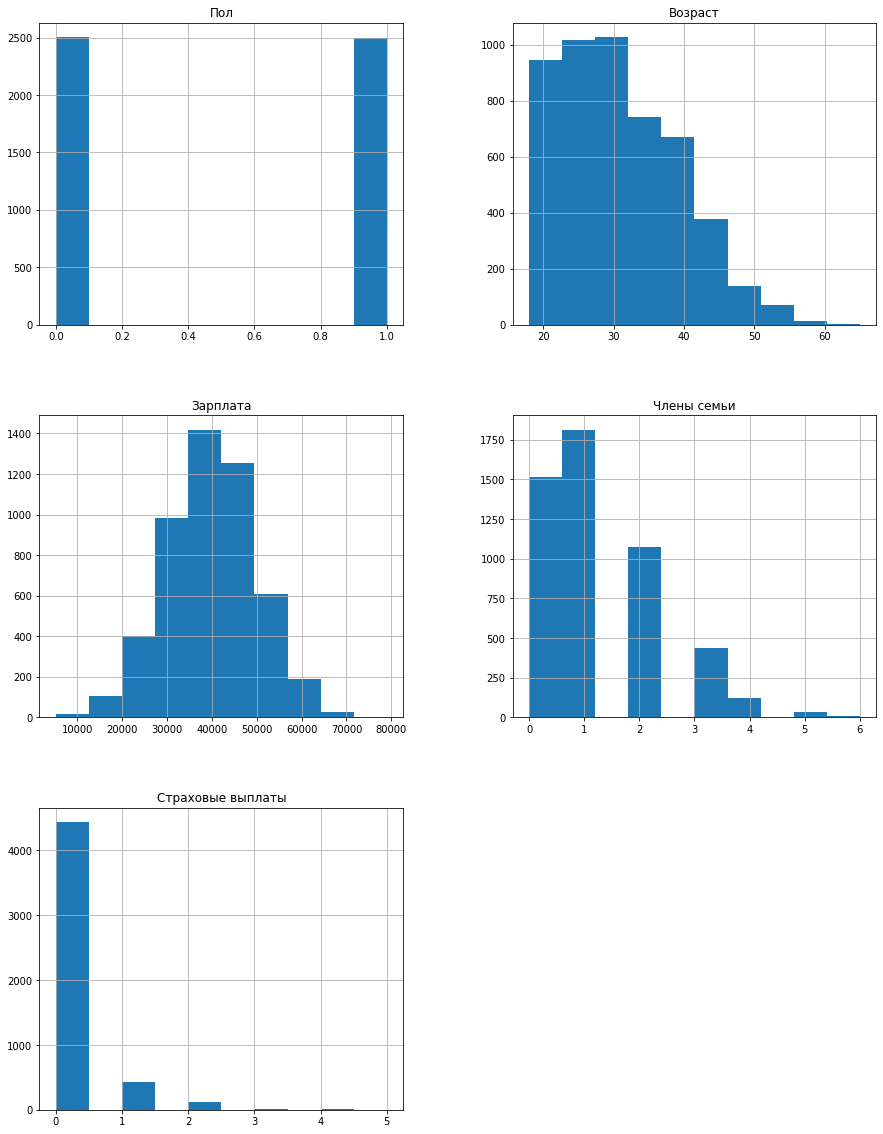

In [ ]:
df.hist(figsize=(15, 20));

Вывод:

Проблем, которые могут повлиять на дальнейшие расчеты не выявлено.
Данные оставляем в таком виде

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

**Ответ:** - Не изменится

**Обоснование:** 

**Тфк как формула предсказания линейной регрессии**
$$
a = Xw
$$

**То для модели на преобразованных признаках**
**Где "Р" случайная обратимая матрица**

$$
a`= X`w`=(XP)w`
$$

**Необходимо доказать**

$$
a = a`
$$

**В формулу обучения** 
$$
w = (X^T X)^{-1} X^T y
$$

**Запишем для**

$$
w`
$$


**Вместо "Х" подставим "ХР"**

$$
w` = ((XP)^T(XP))^{-1}(XP)^Ty
$$

$$
w` = (XP^TXP)^{-1}XP^Ty
$$

$$
w` = (P^T(X^TX)P)^{-1}P^TX^Ty
$$

$$
w` = (P^TX^TXP)^{-1}P^TX^Ty
$$

**При умножении матрицы на обратную получим единичную E**

$$
(P^T)^{-1}P^T = E
$$

$$
w` = (X^TX)^{-1}EP^{-1}X^Ty
$$

**При умножении любой матрицы на единичную, получится та же самая:**

$$
w` = (X^TX)^{-1}P^{-1}X^Ty
$$

**Получается:**

$$
w` = P^{-1}w
$$

**т.к. из условия**

$$
w = (X^T X)^{-1} X^T y
$$

**Подставляем найденное** $$"w`"$$ 

**в формулу для** $$"a`"$$

$$
a` = X(P^{-1}w)
$$

$$
a` = XP(P^{-1}w)
$$

**Сократим** 
$$P$$ и $$P^{-1}
$$

$$
a` = X`w`
$$

$$
a = a`
$$

**Ч.Т.Д.**

**Вывод:**

**Это и требовалось доказать** 

**Качество линейной регресси не изменится**

## Алгоритм преобразования

**Алгоритм**

**Умножим матрицу признаков на обратимую ей, в которой случные величины**

**Обоснование**

In [ ]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

In [ ]:
import numpy as np
r_matr = np.random.normal(size=(4, 4))

созали рандомную

In [ ]:
try:
    inv_matrix = np.linalg.inv(r_matr)
    print('\nОбратная матрица к заданной существует')
except:
    print('\nОбратная матрица к заданной не существует')


Обратная матрица к заданной существует


**Исходные параметры**

$$
a = Xw
$$

$$
w = (X^TX)^{-1}X^Ty
$$

In [ ]:
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
a = features @ w

**Новые параметры**

In [ ]:
features_u = features @ r_matr
w2 = np.linalg.inv(features_u.T.dot(features_u)).dot(features_u.T).dot(target)
a2 = features_u @ w2

In [ ]:
variance = a - a2

In [ ]:
variance.sum()

-0.010823619323548174

**Разницы нет**

**Вывод:**

**При использовании исходных и новых параметров разницы минимально. Качество предсказаний не ухудшится**

## Проверка алгоритма

In [ ]:
class ConstantRegression:
    def model_fit(self, features, target):
        self.model = LinearRegression()
        self.model.fit(features, target)
        
    def predict_result(self, features):
        result = self.model.predict(features)
        return result
        
    def get_r2_score(self, target, predict):
        r2 = r2_score(target, predict)
        return r2  

**Для исходных параметров**

In [ ]:
model1 = ConstantRegression()
model1.model_fit(features, target)
predict_features_t = model1.predict_result(features)
r2_features_t = model1.get_r2_score(target, predict_features_t)

**Умножим на обратимую матрицу**

In [ ]:
model2 = ConstantRegression()
model2.model_fit(features_u, target)
predict_features_u = model2.predict_result(features_u)
r2_features_u = model2.get_r2_score(target, predict_features_u)

In [ ]:
print('r2 исходные   -', r2_features_t)
print('r2 х обр матр -', r2_features_u)

r2 исходные   - 0.4249455028666801
r2 х обр матр - 0.42494550286664756


**Разница не существенна**

**Вывод:**

**При умножении на обратимую матрицу качество не меняется**

**Итоговый вывод**

***В ходе работы было проделано:***

* Загружены и изучены данные. Проблем, которые могут повлиять на дальнейшие расчеты не выявлено. Выявлены дубликаты, но они не повлияли на работу.


* Качество линейной регресии не изменилось от использования исодной матрицы, умноженную на обратимую.


* Создали алгоритм преобразования данных.


* Исследован преобразование данных и проверели метрику R2 для данных.


* По результатам использования матричных операций можно увидеть, что данные очень просто зашифровать от распознования, имея правильную матрицу.